# Task 1: Importing Libraries


In [214]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset





You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [215]:
def generate_examples(num=1000):
    W = [1.0, -3.0]  #Initializing with random values
    b = 1.0
    
    W = np.reshape(W,(2,1))  #W is a 2*1 matrix 
    x = np.random.randn(num,2)
    y = b+np.dot(x,W)+np.random.randn() #Adding noise to y
    y = np.reshape(y,(num,1))
    
    return x,y
    

In [216]:
x,y = generate_examples()

In [217]:
print(x.shape, y.shape)

(1000, 2) (1000, 1)


In [218]:
print(x[0],y[0])

[-0.22558579 -0.17539862] [1.23619279]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$


Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [219]:
class Model:
    def __init__(self,features):
        self.features = features
        self.W = np.random.randn(features,1)
        self.b = np.random.randn() 
        

In [220]:
model = Model(2)
print(model.features)
print(model.W)
print(model.b)


2
[[-0.28560046]
 [-0.10874026]]
-0.8345443201472379


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [221]:
class Model(Model):
    def for_pass(self,x):
        y_hat = self.b+np.dot(x,self.W)
        return y_hat   

In [222]:
y_hat = Model(2).for_pass(x)
print(y_hat.shape)

(1000, 1)


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [223]:
class Model(Model):
    def loss(self,y_hat,y_true):
        loss = np.sum(np.square(y_hat-y_true))
        return loss/(2*y_hat.shape[0])
       

In [224]:
model = Model(2)
y_hat = model.for_pass(x)
loss = model.loss(y_hat,y)

In [225]:
loss

12.257349221222139

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [226]:
class Model(Model):
    def back_pass(self, x, y_true, y_hat):
        m = y_hat.shape[0]
        db = (1/m)*np.sum(y_hat-y_true)
        dW = (1/m)*np.sum(np.dot(np.transpose(y_hat-y_true),x),axis=0)
        return dW,db

In [227]:
model = Model(2)
x,y = generate_examples()
y_hat = model.for_pass(x)
dW,db = model.back_pass(x,y,y_hat)

In [228]:
print(dW, db)

[-0.7646596   1.76024386] -1.1931519822234304


# Task 7: Update Parameters

In [238]:
class Model(Model):
    def update(self,dW,db,lr):
        self.W = self.W - lr*np.reshape(dW,(self.features,1))
        self.b = self.b - db


# Task 8: Training Loop

In [239]:
class Model(Model):
    def train(self, x_train,y_train,iterations,lr):
        losses = []
        for i in range (0,iterations):
            y_hat = self.for_pass(x_train)
            loss = self.loss(y_hat,y_train)
            dW, db = self.back_pass(x_train,y_train,y_hat)
            self.update(dW,db,lr)
            losses.append(loss)
            if i%(iterations/10) == 0:
                print('Iter:{},loss:{:4f}'.format(i,loss))
            
        return losses

In [240]:
model = Model(2)


In [241]:
x_train,y_train = generate_examples()


In [242]:
losses = model.train(x_train,y_train,1000,3e-3)

Iter:0,loss:7.218462
Iter:100,loss:4.057190
Iter:200,loss:2.356623
Iter:300,loss:1.368847
Iter:400,loss:0.795096
Iter:500,loss:0.461833
Iter:600,loss:0.268256
Iter:700,loss:0.155817
Iter:800,loss:0.090507
Iter:900,loss:0.052571


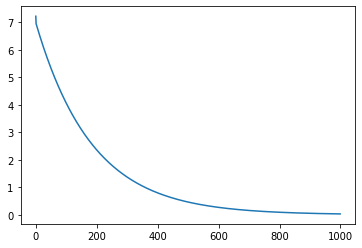

In [243]:
plt.plot(losses)

# Task 9: Predictions

In [253]:
model_untrained = Model(2)
x_test, y_test = generate_examples(800)


In [254]:
preds_untrained = model_untrained.for_pass(x_test)
preds_trained = model.for_pass(x_test)


Text(0, 0.5, 'Original Values')

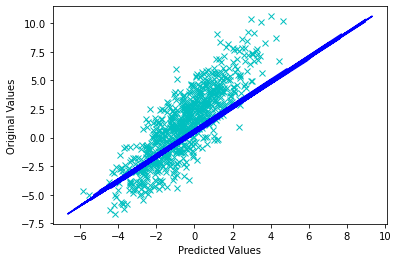

In [255]:
plt.plot(preds_untrained,y_test,'cx')
plt.plot(preds_trained, y_test, 'b')
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')